In [25]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import np_utils

In [2]:
CLASS = [["c0", "Safe Driving"], ["c1", "Text"], ["c2", "Phone"], 
         ["c3", "Adjusting Radio"], ["c4", "Drinking"], 
         ["c5", "Reaching Behind"], ["c6", "Hair or Makeup"], 
         ["c7", "Talking to Passenger"]]
TEST_CLS = [os.path.join(os.getcwd(), "Distracted Driver Dataset", "Combined", "test", cls[0]) for cls in CLASS]
TRAIN_CLS = [os.path.join(os.getcwd(), "Distracted Driver Dataset", "Combined", "train", cls[0]) for cls in CLASS]
for cls_path in TEST_CLS:
  print(cls_path)
  print(len(os.listdir(cls_path)))
for cls_path in TRAIN_CLS:
  print(cls_path)
  print(len(os.listdir(cls_path)))

train_paths = []
test_paths = []
for cls in range(8):
  for train_instance in os.listdir(TRAIN_CLS[cls]):
    train_paths.append(os.path.join(TRAIN_CLS[cls], train_instance))
  for test_instance in os.listdir(TEST_CLS[cls]):
    test_paths.append(os.path.join(TEST_CLS[cls], test_instance))
classes = []
test_classes = []
for cls in range(8):
  for train_instance in os.listdir(TRAIN_CLS[cls]):
    classes.append(cls)
  for test_instance in os.listdir(TEST_CLS[cls]):
    test_classes.append(cls)
df = pd.DataFrame({
  'filename': train_paths,
  'class': classes
})
df_test = pd.DataFrame({
  'filename': test_paths,
  'class': test_classes
})

c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c0
346
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c1
393
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c2
364
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c3
170
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c4
143
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c5
143
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\CS3244-Group-8-Project-2\Distracted Driver Dataset\Combined\test\c6
146
c:\Users\wamik\Documents\Notes Y4S2\CS3244\Projects\Project 2\

In [12]:
X_train_final = []
Y_train = []
for index, path in df.iterrows():
    img_orig = cv2.imread(path[0], cv2.IMREAD_GRAYSCALE)
    k = min(1.0, 1024/max(img_orig.shape[0], img_orig.shape[1]))
    img = cv2.resize(img_orig, (64, 48), fx=k, fy=k, interpolation=cv2.INTER_LANCZOS4)
    img = np.expand_dims(img, axis=2)
    X_train_final.append(np.asarray(img/255))
    Y_train.append(path[1])
    if (index+1) % 135 == 0:
        print("Processed ", index + 1, "images. Continuing...")

print("Done!")

Processed  135 images. Continuing...
Processed  270 images. Continuing...
Processed  405 images. Continuing...
Processed  540 images. Continuing...
Processed  675 images. Continuing...
Processed  810 images. Continuing...
Processed  945 images. Continuing...
Processed  1080 images. Continuing...
Processed  1215 images. Continuing...
Processed  1350 images. Continuing...
Processed  1485 images. Continuing...
Processed  1620 images. Continuing...
Processed  1755 images. Continuing...
Processed  1890 images. Continuing...
Processed  2025 images. Continuing...
Processed  2160 images. Continuing...
Processed  2295 images. Continuing...
Processed  2430 images. Continuing...
Processed  2565 images. Continuing...
Processed  2700 images. Continuing...
Processed  2835 images. Continuing...
Processed  2970 images. Continuing...
Processed  3105 images. Continuing...
Processed  3240 images. Continuing...
Processed  3375 images. Continuing...
Processed  3510 images. Continuing...
Processed  3645 ima

In [13]:
X_train_final = np.asarray(X_train_final)
X_train_final.shape

(12555, 48, 64, 1)

In [27]:
Y_train = np.asarray(Y_train)
Y_train = np_utils.to_categorical(Y_train, 8)
print('New y_train shape: ', Y_train.shape)
Y_train.shape

New y_train shape:  (12555, 8)


(12555, 8)

In [15]:
X_test_processed = []
Y_test = []
for index, path in df_test.iterrows():
    img_orig = cv2.imread(path[0], cv2.IMREAD_GRAYSCALE)
    k = min(1.0, 1024/max(img_orig.shape[0], img_orig.shape[1]))
    img = cv2.resize(img_orig, (64, 48), fx=k, fy=k, interpolation=cv2.INTER_LANCZOS4)
    img = np.expand_dims(img, axis=2)
    X_test_processed.append(np.asarray(img/255))
    Y_test.append(path[1])
    if (index+1) % 135 == 0:
        print("Processed ", index + 1, "images. Continuing...")

print("Done!")

Processed  135 images. Continuing...
Processed  270 images. Continuing...
Processed  405 images. Continuing...
Processed  540 images. Continuing...
Processed  675 images. Continuing...
Processed  810 images. Continuing...
Processed  945 images. Continuing...
Processed  1080 images. Continuing...
Processed  1215 images. Continuing...
Processed  1350 images. Continuing...
Processed  1485 images. Continuing...
Processed  1620 images. Continuing...
Processed  1755 images. Continuing...
Processed  1890 images. Continuing...
Done!


In [26]:
X_test_processed = np.asarray(X_test_processed)
Y_test = np.asarray(Y_test)
Y_test = np_utils.to_categorical(Y_test, 8)
print('New y_train shape: ', Y_test.shape)
Y_test.shape

New y_train shape:  (1923, 8)


(1923, 8)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 46, 62, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 12, 64)         36928     
                                                                 
 global_average_pooling2d (G  (None, 64)              

In [34]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)
]

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 200
EPOCHS = 30

history = model.fit(X_train_final, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=callbacks_list,
                    validation_data=(X_test_processed, Y_test))

Epoch 1/30
63/63 [==============================] - 6s 87ms/step - loss: 1.9928 - accuracy: 0.2008 - val_loss: 1.9899 - val_accuracy: 0.1799
Epoch 2/30
63/63 [==============================] - 5s 75ms/step - loss: 1.9713 - accuracy: 0.2074 - val_loss: 1.9942 - val_accuracy: 0.1799
Epoch 3/30
63/63 [==============================] - 5s 75ms/step - loss: 1.9556 - accuracy: 0.2117 - val_loss: 1.9837 - val_accuracy: 0.1716
Epoch 4/30
63/63 [==============================] - 5s 74ms/step - loss: 1.9295 - accuracy: 0.2330 - val_loss: 1.9683 - val_accuracy: 0.2122
Epoch 5/30
63/63 [==============================] - 5s 74ms/step - loss: 1.8907 - accuracy: 0.2577 - val_loss: 1.9831 - val_accuracy: 0.2179
Epoch 6/30
63/63 [==============================] - 5s 74ms/step - loss: 1.8488 - accuracy: 0.2744 - val_loss: 1.9991 - val_accuracy: 0.1841
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 1.8021 - accuracy: 0.2957 - val_loss: 1.9812 - val_accuracy: 0.2179
Epoch 8/30
63

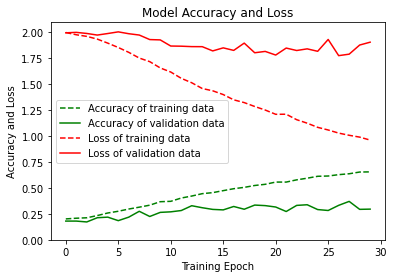

In [35]:
# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_accuracy'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()